# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error , r2_score
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('IMDb Movies India.csv',encoding='latin-1')

In [3]:
## To check for top 5 rows
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


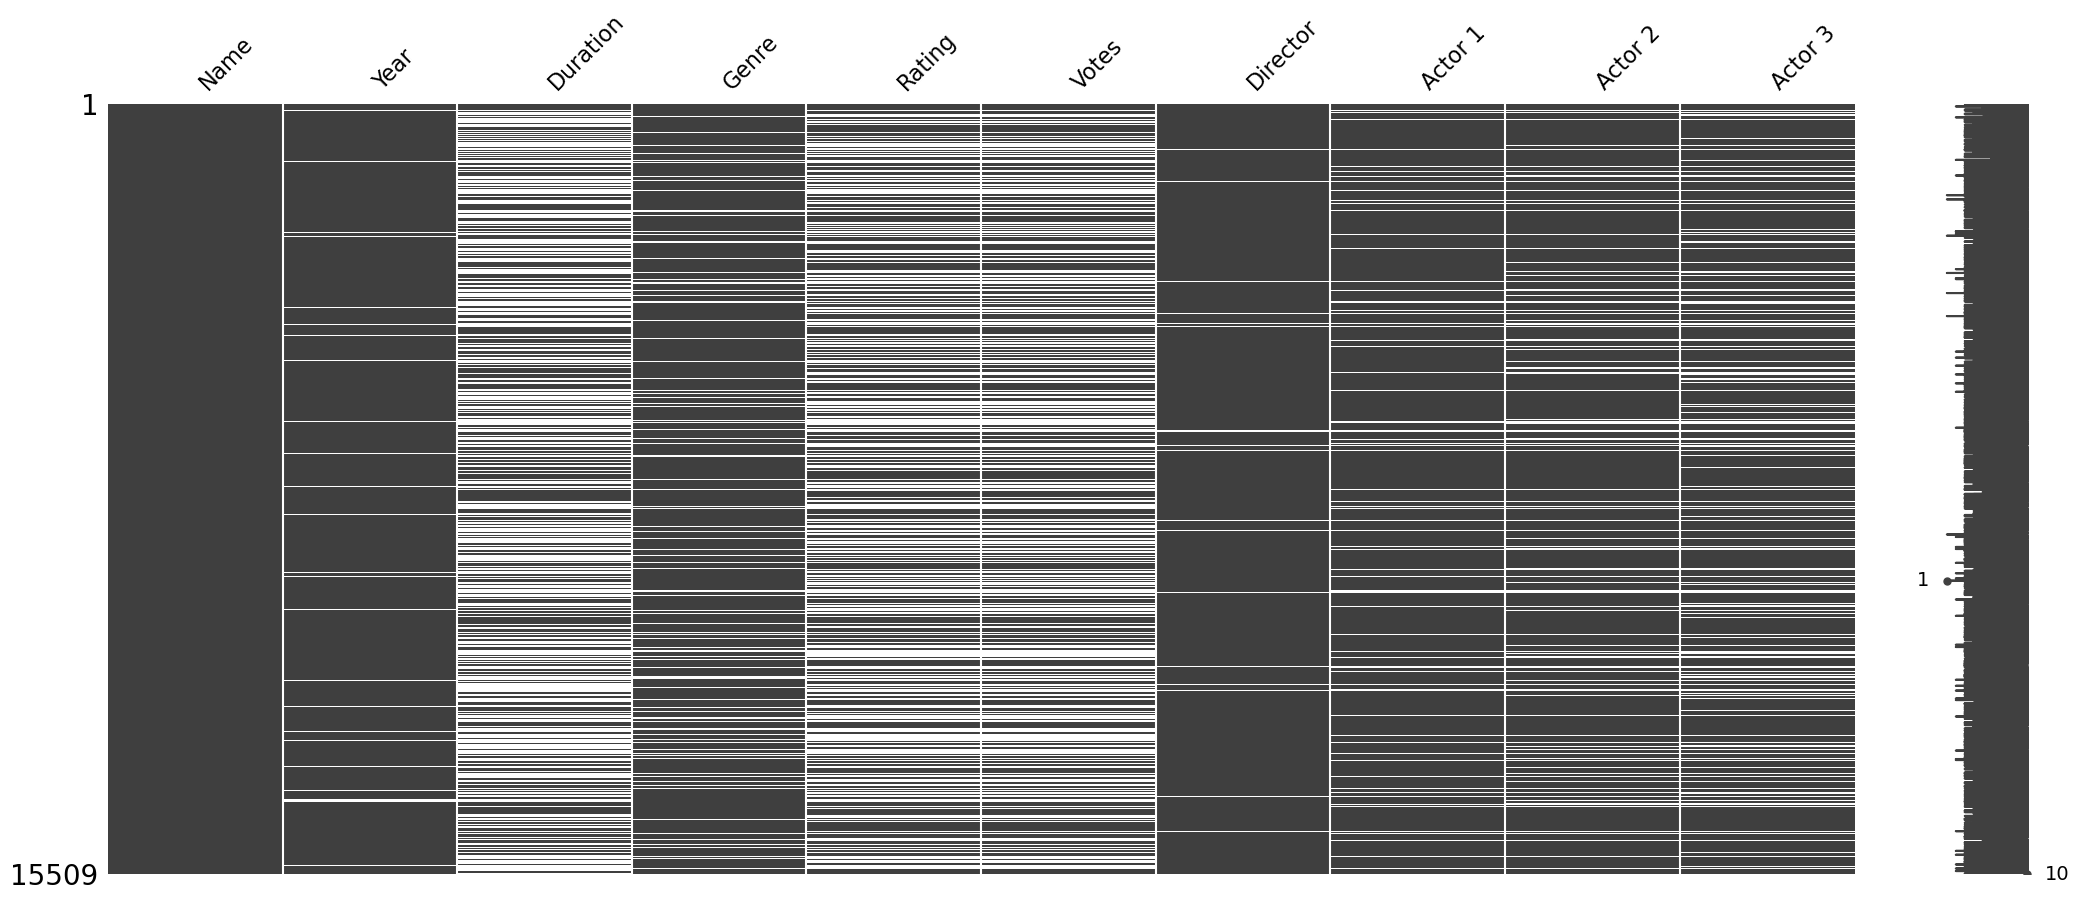

In [5]:
## Check for Null Values
import missingno as msno
msno.matrix(data)
plt.show()

In [6]:
# There are missing values in our data. Now to let see exam count
missing_count = data.isnull().sum().sort_values(ascending= False)
missing_percent = (round(data.isnull().sum()/data.isnull().count(),4) * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_count,missing_percent],axis = 1 ,keys= ['missing_count','missing_percent'])

In [7]:
missing_data

,missing_count,missing_percent
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


There are 48.94 % of missing data in Rating variable. We are going to predict rating of movie so let us remove missing values

In [8]:
data.dropna(subset=['Rating'],inplace=True )
# Now to remove missing values from other varaible
data.dropna(subset=['Genre' , 'Director' , 'Actor 1','Actor 2','Actor 3'],inplace=True)
# To check again for missing values
data.isna().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [9]:
data.reset_index(inplace = True)
data.drop('index',axis =1,inplace = True)

In [10]:
# Let us change the data type of Year , Duration and Year column because we want them int data type
# Year variable
data['Year'] = data['Year'].replace(r'.0' , '',regex = True).abs().astype('int64')

# Duration variable
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(r'min','',regex=True),errors='coerce')

# Year variable
data['Votes'] = pd.to_numeric(data['Votes'].str.replace(r',','',regex=True),errors='coerce')

In [11]:
## Replacing Missing value of Duration Variable by mean Duration
data['Duration'].fillna(data['Duration'].mean() , inplace = True)
data['Duration'] = np.round(data['Duration'],decimals= 2)

In [12]:
# Check for Duplicate
duplicates = data.duplicated().sum()

print(duplicates)
# There are no duplicates row in Data Set

0


# Exploratory Data Analysis

In [13]:
Distribution_Year = px.histogram(data_frame= data , x = 'Year', height=300 , width=800)
Distribution_Year.update_layout(title = 'Distribution of Year',xaxis_title='Year',yaxis_title = 'Frequency',bargap = 0.1 )
Distribution_Year.show()

In [14]:
Distribution_Year = px.histogram(data_frame= data , x = 'Duration', height=300 , width=800,nbins = 40)
Distribution_Year.update_layout(title = 'Distribution of Duration',xaxis_title='Duration',yaxis_title = 'Frequency',bargap = 0.1)
Distribution_Year.show()

In [15]:
Distribution_Year = px.histogram(data_frame= data , x = 'Rating', height=300 , width=800,nbins = 40)
Distribution_Year.update_layout(title = 'Distribution of Rating',xaxis_title='Rating',yaxis_title = 'Frequency',bargap = 0.1)
Distribution_Year.show()

In [16]:
for i in ['Year','Duration','Rating']:
    fig_box = px.box(data_frame = data , x = i,height=250,width=800)
    fig_box.show()
    

In [17]:
# Insight
# The distribution of Year is skewed towards left with a high concentration of movies directed in between 2015-2019
# The distribution of Rating having a guassian distribution with a high concentration of 6.3 and 6.7

In [18]:
# Year with best rating
avaerage_rating_by_year  = data.groupby('Year')['Rating'].mean().reset_index()
fig = px.line(data_frame= avaerage_rating_by_year , x = 'Year' , y ='Rating', color_discrete_sequence=['#559C9E'],height=350,width=800)
fig.update_layout(title = 'Rating By Year')
fig.show()

-- Year 1948 has highest average Rating of 7.13

In [19]:
# Scatter plot between length of movie duration and rating
fig_scatter = px.scatter(data_frame = data , x = 'Duration',y ='Rating',height=400,width=800, color = "Rating",trendline = 'ols')
fig_scatter.update_traces(marker_size=3)
fig_scatter.update_layout(title = "Scatter plot : Rating by Duration", xaxis_title = 'Duration', yaxis_title = 'Rating')
fig_scatter.show()

-- As Duration of movie increase we can see rating also increase

In [20]:
# Top 10 movies according to rating per year and overall

In [21]:
top_10_movies_by_rating = data.nlargest(10,'Rating')
fig_top_10_movies = px.bar(data_frame = top_10_movies_by_rating , y = 'Rating',x = 'Name',color = 'Year',height = 350,width = 700)
fig_top_10_movies.update_layout()
fig_top_10_movies.show()

Movie  Name Love Qubool Hai has got highest rating (10.0) and it was released in Year 2020

In [22]:
# Number of Popular movies released each year
popular_movies_by_year = data.groupby('Year')['Rating','Name'].max().reset_index()
popular_movies_by_year = pd.DataFrame(popular_movies_by_year.sort_values(by = 'Year',ascending=True))
popular_movies_by_year

,Year,Rating,Name
0,1917,6.7,Lanka Dahan
1,1931,6.2,The Light of the World
2,1932,6.0,Indrasabha
3,1933,7.2,Fate
4,1934,8.5,Piya Pyare
...,...,...,...
87,2017,9.0,Yeh Hai India
88,2018,9.3,Zoo
89,2019,9.4,Zindagi Tumse
90,2020,10.0,Yeh Ballet


In [23]:
# Find the row with the highest number of votes and movie name
max_votes_row = data[data['Votes'] == data['Votes'].max()]
movie_highest_votes = max_votes_row['Name'].values[0]
count_highest_votes = max_votes_row['Votes'].values[0]

print('Movie with highest votes:',movie_highest_votes)
print('Number of votes for the movie with the highest votes:',count_highest_votes)


Movie with highest votes: Life of Pi
Number of votes for the movie with the highest votes: 591417


In [24]:
# Find the row with the highest number of votes and movie name
min_votes_row = data[data['Votes'] == data['Votes'].min()]
movie_lowest_votes = min_votes_row['Name'].values[0]
count_lowest_votes = min_votes_row['Votes'].values[0]

print('Movie with lowest votes:',movie_lowest_votes)
print('Number of votes for the movie with the lowest votes:',count_lowest_votes)


Movie with lowest votes: Aabshar
Number of votes for the movie with the lowest votes: 5


In [25]:
# which Director directed the most movies
director = data['Director'].value_counts()
highest_director_name = director.idxmax()
highest_director_movie_count = director.max()

print("Highest Number of  Movie Directed by :",highest_director_name)
print("Number of Movies Directed:",highest_director_movie_count)

Highest Number of  Movie Directed by : Mahesh Bhatt
Number of Movies Directed: 45


In [26]:
#Insights:
# Year 1948 has highest average Rating of 7.13
# Movie  Name Love Qubool Hai has got highest rating (10.0) and it was released in Year 2020.
# Movie with highest votes: Life of Pi
# Number of votes for the movie with the highest votes: 591417
# Movie with lowest votes: Aabshar
# Number of votes for the movie with the lowest votes: 5
# Highest Number of  Movie Directed by : Mahesh Bhatt
# Number of Movies Directed: 45



# Feature Engineering

In [27]:
# Drop name column
data.drop('Name',axis = 1 , inplace= True)

In [28]:
for col in data.columns:
    print(f"Name of Column : {col}")
    print(data[col].unique())
    print(f"Unique items count - {col} : {len(data[col].unique())}")

Name of Column : Year
[2019 1997 2005 2012 2014 2004 2016 1991 2018 2010 1958 2021 2017 2009
 1993 2002 1946 2008 1994 2007 2013 2003 1998 1979 1974 2015 2006 1981
 2020 1985 2011 1988 1995 1987 1999 1973 1968 1953 1986 1982 1977 1950
 1969 1948 1967 1970 1990 1989 1947 2001 2000 1971 1978 1944 1963 1992
 1976 1984 1975 1980 1966 1972 1956 1960 1964 1952 1959 1951 1954 1962
 1961 1957 1965 1996 1933 1955 1983 1936 1949 1940 1945 1938 1941 1942
 1932 1935 1937 1931 1943 1917 1939 1934]
Unique items count - Year : 92
Name of Column : Duration
[109.   110.   147.   142.    82.   116.    96.   120.   161.   166.
 102.    87.   132.   105.   146.   168.   158.   126.   133.44  94.
 138.   124.   144.   157.   136.   107.   113.    80.   122.   149.
 148.   130.   121.   188.   115.   103.   114.   170.   100.    99.
 140.   128.    93.   125.   145.    75.   111.   134.   104.    92.
 137.   127.   119.   135.    90.   150.   151.    95.   112.   143.
 177.   117.   123.    72.   154.   175

In [29]:
# Converting the categorical varibale into numeric type using transfrom function
data['Genre_mean_rating'] = data.groupby('Genre')['Rating'].transform('mean')

data['Director_mean_rating'] = data.groupby('Director')['Rating'].transform('mean')

data['Actor1_mean_rating'] = data.groupby('Actor 1')['Rating'].transform('mean')

data['Actor2_mean_rating'] = data.groupby('Actor 2')['Rating'].transform('mean')

data['Actor3_mean_rating'] = data.groupby('Actor 3')['Rating'].transform('mean')

In [30]:
data.drop(columns=['Genre','Director','Actor 1','Actor 2','Actor 3'],axis = 1,inplace=True)

In [31]:
# Define Independent Variable and Dependent Variable
X = data.drop(['Rating'],axis = 1)
y = data['Rating']

In [32]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.2,random_state=42)

In [33]:
print(f"X_train size : {X_train.shape}")
print(f"X_test size : {X_test.shape}")
print(f"y_train size : {y_train.shape}")
print(f"y_test size : {y_test.shape}")

X_train size : (6046, 8)
X_test size : (1512, 8)
y_train size : (6046,)
y_test size : (1512,)


In [34]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
lr1_pred = lr1.predict(X_test)

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr1_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr1_pred))
print('R2 score: ',r2_score(y_test, lr1_pred),'\n')

rf1 = RandomForestRegressor()
rf1.fit(X_train , y_train)
rf1_pred = rf1.predict(X_test)

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf1_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf1_pred))
print('R2 score: ',r2_score(y_test, rf1_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.44791444362217847
Mean absolute error:  0.49854536243479725
R2 score:  0.758254854816593 



The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.37513518386243383
Mean absolute error:  0.42444973544973547
R2 score:  0.7975347507151971
